<a href="https://colab.research.google.com/github/saniagonsalves/DM_Clustering-Techniques/blob/main/4_Sania_DB_Scan_clustering_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.datasets import get_data
dataset = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [ ]:
dataset.shape

(1070, 19)

**Data preprocessing and modelling**

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1016, 19)
Unseen Data For Predictions: (54, 19)


**Initializing the PyCaret Environment**

In [ ]:
from pycaret.clustering import *

exp_clu101 = setup(data, normalize = True, 
                   ignore_features = ['Id'],
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(1016, 19)"
2,Missing Values,False
3,Numeric Features,12
4,Categorical Features,6
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1016, 30)"
9,CPU Jobs,-1


**Creating a Model**

In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3131,332.5809,1.2526,0,0,0


**The create_model() function lets us easily create and evaluate the clustering model of our preference, such as the K-Means algorithm**

In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [ ]:
kmodes = create_model('kmodes', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0769,84.6239,2.2464,0,0,0


In [ ]:
print(kmodes)

KModes(cat_dissim=<function matching_dissim at 0x7feb1b084dd0>, init='Cao',
       max_iter=100, n_clusters=6, n_init=1, n_jobs=-1, random_state=123,
       verbose=0)


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Cluster
0,311,CH,272,2,1.86,2.18,0.0,0.06,0,0,0.471378,2.12,1.86,0.26,No,0.027523,0.0,0.32,2,Cluster 0
1,846,MM,274,2,1.96,2.18,0.0,0.80,0,1,0.263607,1.38,1.96,-0.58,No,0.366972,0.0,0.22,2,Cluster 3
2,488,CH,238,2,1.75,1.99,0.0,0.00,0,0,0.744000,1.99,1.75,0.24,No,0.000000,0.0,0.24,2,Cluster 1
3,55,CH,256,4,1.99,2.29,0.0,0.00,0,0,0.667976,2.29,1.99,0.30,No,0.000000,0.0,0.30,4,Cluster 0
4,293,MM,270,2,1.86,2.18,0.0,0.00,0,0,0.000396,2.18,1.86,0.32,No,0.000000,0.0,0.32,2,Cluster 0


**Exploratory Data Analysis**

In [ ]:
plot_model(kmeans)

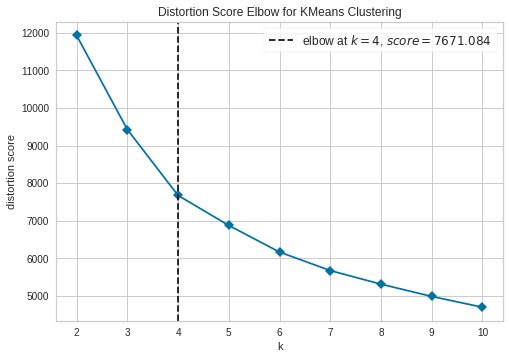

In [ ]:
plot_model(kmeans, plot = 'elbow')

The plot_model() function lets us create various useful graphs for our model. In this case, we created an elbow plot that will help us find the optimal number of clusters for the K-Means model. 

The elbow method trains the clustering model for a range of K values, and visualizes the distortion score for each one of them.

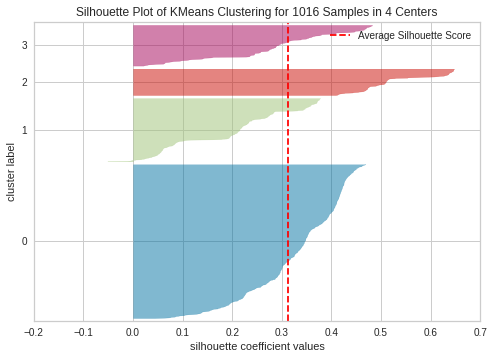

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
plot_model(kmeans, plot = 'distribution')

**Saving and Assigning the Model**

In [ ]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Cluster
0,4,MM,227,1,1.69,1.69,0.0,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,Cluster 1
1,6,CH,230,7,1.69,1.99,0.0,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0,Cluster 1
2,49,CH,246,4,1.99,2.23,0.0,0.0,0,0,0.886992,2.23,1.99,0.24,No,0.000000,0.000000,0.24,4,Cluster 0
3,87,CH,277,4,2.09,2.09,0.2,0.4,0,0,0.978010,1.69,1.89,-0.20,No,0.191388,0.095694,0.00,4,Cluster 3
4,90,CH,277,3,2.09,2.09,0.2,0.4,0,0,0.795200,1.69,1.89,-0.20,No,0.191388,0.095694,0.00,3,Cluster 3


The predict_model() function lets us save the clustering model to the local disk for future use or deployment as an application. 